In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [82]:
dataFrame = pd.read_csv('musteriler.csv')
dataFrame.head() ## Verilere genel bakış(kolonları sütünları görmek için)

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


Veriyi Anlamak

In [83]:
dataFrame.describe() ## Verinin istatistikleri

,No,Yas,Hacim,Maas
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


In [84]:
dataFrame.isnull().sum() ## Null verilerin kontrolü

No          0
Cinsiyet    0
Yas         0
Hacim       0
Maas        0
dtype: int64

<AxesSubplot:xlabel='Hacim', ylabel='Maas'>

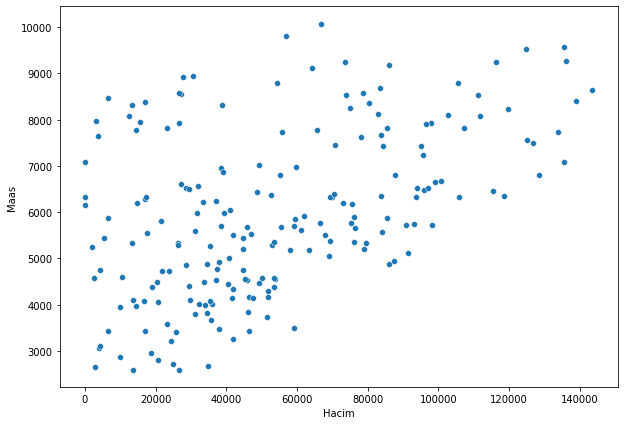

In [85]:
plt.figure(figsize=(10,7)) ## exponansiyel(üstsel) artış
sbn.scatterplot(x='Hacim',y='Maas',data=dataFrame) ## Noktasal grafik

In [52]:
cinsiyet = dataFrame.iloc[:,1:2].values

In [53]:
from sklearn import preprocessing

In [54]:
labelEncoder = preprocessing.LabelEncoder()
cinsiyet[:,0] = labelEncoder.fit_transform(dataFrame.iloc[:,1:2])

In [55]:
oneHotEncoder = preprocessing.OneHotEncoder()
cinsiyet = oneHotEncoder.fit_transform(cinsiyet).toarray()

In [56]:
y = cinsiyet

Model Oluşturma

In [86]:
x = dataFrame.iloc[:,2:4].values ## Bağımsız

In [87]:
from sklearn.cluster import KMeans

In [88]:
kmeans = KMeans(n_clusters= 3 ,init='k-means++',random_state=0)
kmeans.fit(x)

KMeans(n_clusters=3, random_state=0)

In [89]:
print(kmeans.cluster_centers_) ## Merkez nokta koordinatları
print(f'wssq: {kmeans.inertia_}')

[[4.14235294e+01 2.20694118e+04]
 [5.77391304e+01 1.04386957e+05]
 [4.42608696e+01 5.86434783e+04]]
wssq: 36852754776.64554


In [90]:
## Optimum k değerini bulmak
result = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(x)
    result.append(kmeans.inertia_)
result    

[241761426840.19498,
 68604612132.47226,
 36852754776.64554,
 19208746585.818188,
 12441143025.898335,
 8162831945.783776,
 6244420604.634291,
 4889574238.419642,
 3724785696.8736567,
 2843237882.479835]

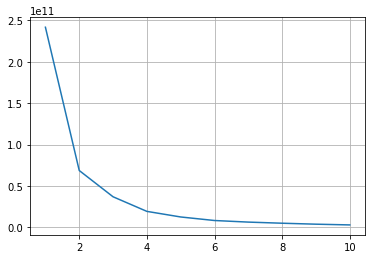

In [91]:
## k değerleri optimum noktalar dirsek noktaları yani 2 ,3 ,4 olabilir
plt.plot(range(1,11),result)
plt.grid()

In [92]:
from sklearn.preprocessing import StandardScaler

In [93]:
standardScaler = StandardScaler()
x = standardScaler.fit_transform(x)

In [95]:
guess = KMeans(n_clusters= 3, random_state= 0).fit_predict(x)

Text(0.5, 1.0, 'Incorrect Number of Data')

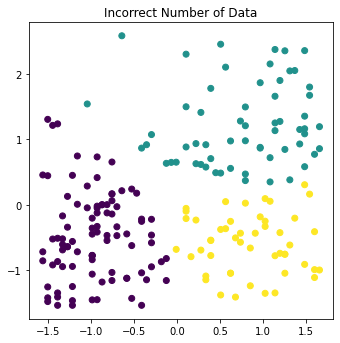

In [96]:
plt.figure(figsize=(12, 12))
plt.subplot(221)
plt.scatter(x[:, 0], x[:, 1], c=guess)
plt.title("Incorrect Number of Data")

Text(0.5, 1.0, 'Anisotropicly Distributed Data')

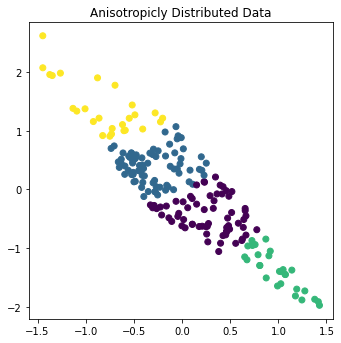

In [97]:
plt.figure(figsize=(12, 12))
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(x, transformation)
guess = KMeans(n_clusters=4, random_state=0).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=guess)
plt.title("Anisotropicly Distributed Data")

Text(0.5, 1.0, 'Unevenly Sized Blobs')

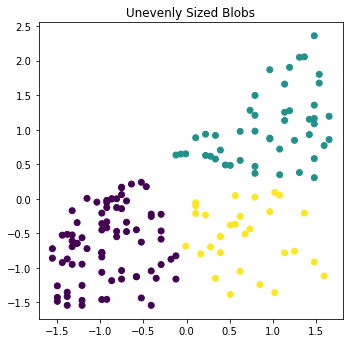

In [103]:
plt.figure(figsize=(12, 12))
X_filtered = np.vstack((x[guess == 0][:500], x[guess == 1][:100], x[guess == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=0).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Data")